In [ ]:
# mounting my google drive because I have my dataset uploaded in google drive
from google.colab import drive
drive.mount('/content/drive')

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preprocessing**

### Reading Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/001 My Skills/002 CS Engineering   Automated Math (BPHC)/004 Data Science (DS)   Artificial Intelligence (AI)/004 Tabular Time Series Data (Structured Data) (Sequential Data)/002 Supervised Machine Learning (ML)/Regression (Forcasting) Problem/001 Univariate Analysis/001 Overall Trend/007 Deep Learning (DL) Models/2.1 Long Short Term Memory (LSTM) RNN Model/Google_Stock_Price.csv')
dataset

,Date,Stock_price
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1273,1/25/2017,829.62
1274,1/26/2017,837.81
1275,1/27/2017,834.71
1276,1/30/2017,814.66


In [ ]:
stock_price = dataset['Stock_price'].values
stock_price

array([325.25, 331.27, 329.83, ..., 834.71, 814.66, 796.86])

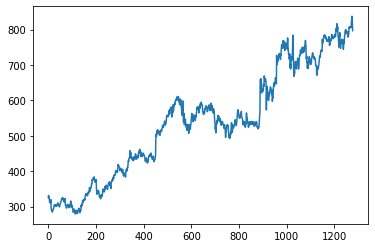

In [ ]:
plt.plot(stock_price)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
stock_price_scaled = sc.fit_transform(stock_price.reshape((stock_price.shape[0],1)))
stock_price_scaled

array([[0.08256815],
       [0.09334336],
       [0.0907659 ],
       ...,
       [0.99445131],
       [0.95856378],
       [0.92670354]])

### Train Test Split

In [ ]:
stock_price_scaled_train = stock_price_scaled[:1258,:]
stock_price_scaled_test = stock_price_scaled[1198:,:]

In [ ]:
stock_price_scaled_train.shape

(1258, 1)

In [ ]:
stock_price_scaled_test.shape

(80, 1)

## **Building and Training the Stacked LSTM RNN**

In [ ]:
### Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
# creating a 4 stacked LSTM RNN Model

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1))) # return_sequences = True tells the library to return hidden states 
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='sigmoid', return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer i.e. the optional V matrix wala layer because it is requried here
regressor.add(Dense(units = 1))

# remeber that here we are not putting the optional softmax layer

The first parameter i.e. units=50 denotes the no of LSTM recurrent units in that LSTM RNN layer

The third parameter i.e. return_sequences = True is a required parameter that must be set to True when stacking two or more  LSTM layers.
Basically that's simple, you just have to include return_sequences = True in your LSTM class if your next layer is an LSTM layer.
However if your next layer is a fully connected layer (created with the Dense class), then make sure to do return_sequences = False from the parameters of the LSTM class. 
Also if you are not stacking LSTM layers then also put return_sequences = False because you dont want to pass hidden states to output layer. Default value of return_sequences is False.

In previous video we saw 2 LSTM RNN stacked over each other if you just want simple LSTM RNN network (i.e. no stacking of LSTM RNN layers) 
then we would have just 1 LSTM RNN layer with return_sequences = False followed by a Dense Layer, rest everything remains same.

    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = False, input_shape = (,)))
    regressor.add(Dense(units = 1))

In [ ]:
regressor.trainable_weights # there are many such regressor._________ fucntions - explore

[<tf.Variable 'lstm_4/lstm_cell_4/kernel:0' shape=(1, 200) dtype=float32, numpy=
 array([[ 0.13589495, -0.09616663,  0.08305565,  0.08905607, -0.06046011,
         -0.13065197, -0.08981698,  0.14316842,  0.16844147,  0.03511859,
          0.08804941,  0.02693707, -0.04722476, -0.15873498, -0.14093673,
         -0.13360016,  0.14166576, -0.09845953,  0.17178082,  0.13161048,
         -0.05347222, -0.12117074,  0.03259493, -0.07390673,  0.06097423,
         -0.08287679,  0.03803802,  0.14620784, -0.03299482, -0.16253069,
         -0.13959584, -0.04637578, -0.00869399, -0.11010167, -0.02929266,
          0.13507193, -0.150893  , -0.03207788,  0.13167873,  0.02864026,
         -0.07775497,  0.11940697, -0.14496224, -0.08867554,  0.07175508,
          0.05645747,  0.14352563,  0.1265302 , -0.00484514,  0.04347427,
          0.1641674 ,  0.10168824, -0.110232  ,  0.06750166,  0.04529914,
          0.00116442,  0.01799381, -0.00873102, -0.07359255,  0.15913746,
          0.12744209, -0.111365

In [ ]:
### Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # use cross_entropy_error instead

In [ ]:
### Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 113ms/step - loss: 0.5735
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0716
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0618
Epoch 4/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0422
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0263
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0185
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0141
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0128
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0106
Epoch 10/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0114
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0119
Epoch 12/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0095
Epoch 13/100

## **Predicting**

In [ ]:
y_train_predicted = regressor.predict(X_train)
y_test_predicted = regressor.predict(X_test)

In [ ]:
y_train_predicted

array([[0.0334083 ],
       [0.03617379],
       [0.03920922],
       ...,
       [0.8849426 ],
       [0.8854495 ],
       [0.8855254 ]], dtype=float32)

In [ ]:
y_train

array([0.08301563, 0.08151211, 0.07172135, ..., 0.92104745, 0.90248617,
       0.90144803])

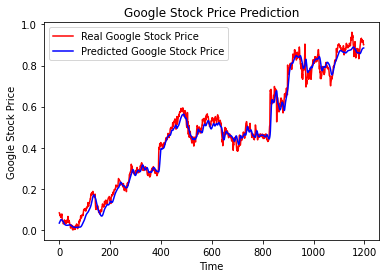

In [ ]:
plt.plot(y_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_train_predicted, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
y_test_predicted

array([[0.8852429 ],
       [0.8845897 ],
       [0.88396573],
       [0.8833583 ],
       [0.8830822 ],
       [0.88344246],
       [0.88429797],
       [0.8853492 ],
       [0.8865112 ],
       [0.88768476],
       [0.8887879 ],
       [0.8897528 ],
       [0.8905601 ],
       [0.8912628 ],
       [0.8918746 ],
       [0.8927137 ],
       [0.89382154],
       [0.89518225],
       [0.89655936],
       [0.897542  ]], dtype=float32)

In [ ]:
y_test

array([0.89439582, 0.91148938, 0.9074084 , 0.9238397 , 0.9437792 ,
       0.94639245, 0.94127334, 0.94510372, 0.94571229, 0.94499633,
       0.94272316, 0.94148812, 0.94469205, 0.94530061, 0.97223863,
       0.98534071, 1.        , 0.99445131, 0.95856378, 0.92670354])

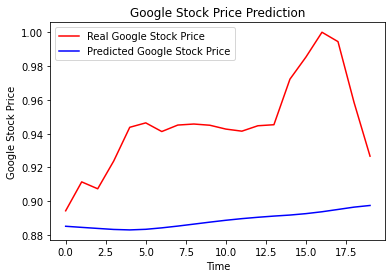

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_test_predicted, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()